In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
happiness = pd.read_csv('cleanHappiness.csv',index_col=[0])
dfSuicide = pd.read_csv('cleanData.csv')
ddTerr = pd.read_csv('DST.csv')
usaOnly = dfSuicide[dfSuicide['country']=='United States']
test =usaOnly.loc[usaOnly['sex']==1].groupby('year').sum()
testWomen =usaOnly.loc[usaOnly['sex']==2].groupby('year').sum()


In [73]:
testWomen['percapita'] = testWomen['suicides_no']/testWomen['population']
test['percapita'] = test['suicides_no']/test['population']


In [94]:
testTwo=dfSuicide.copy()
testTwo.sex[testTwo.sex == 1] = "Male"
testTwo.sex[testTwo.sex == 2] = "Female"
# testTwo.generation[testTwo.generation == 1] = 'G.I. Generation'
# testTwo.generation[testTwo.generation == 2] = 'Silent'
# testTwo.generation[testTwo.generation == 3] = 'Boomers'
# testTwo.generation[testTwo.generation == 4] = 'Generation X'
# testTwo.generation[testTwo.generation == 5] = 'Millennials'
# testTwo.generation[testTwo.generation == 6] = 'Generation Z'
testTwo.generation[testTwo.generation == 1] = 'G.I.'
testTwo.generation[testTwo.generation == 2] = 'Silent'
testTwo.generation[testTwo.generation == 3] = 'Boomers'
testTwo.generation[testTwo.generation == 4] = 'X'
testTwo.generation[testTwo.generation == 5] = 'Millennials'
testTwo.generation[testTwo.generation == 6] = 'Z'

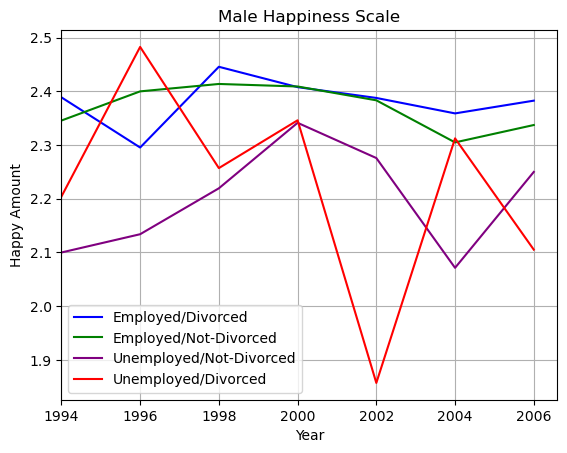

In [26]:
fig, ax = plt.subplots()
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==0)&(happiness['unem10']==0)&(happiness['divorce']==1)], ax=ax, color='blue',label="Employed/Divorced")
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==0)&(happiness['divorce']==0)&(happiness['unem10']==0)], ax=ax, color='green',label="Employed/Not-Divorced")
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==0)&(happiness['unem10']==1)&(happiness['divorce']==0)], ax=ax, color='purple',label="Unemployed/Not-Divorced")
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==0)&(happiness['divorce']==1)&(happiness['unem10']==1)], ax=ax, color='red',label="Unemployed/Divorced")

# sns.lineplot(x='year',y='happy',ci=None,data=df[df['female']==1], ax=ax, color='red',label="Female Happiness")


ax.set_title('Male Happiness Scale')
ax.set_xlabel('Year')
ax.set_ylabel('Happy Amount')

ax.grid()
ax.set_xlim(xmin=1994)

# Show the legend
ax.legend()
# Show the plot
plt.show()

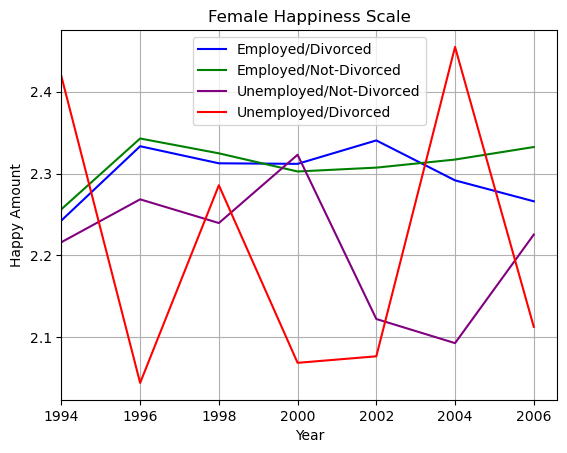

In [27]:
fig, ax = plt.subplots()
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==1)&(happiness['unem10']==0)&(happiness['divorce']==1)], ax=ax, color='blue',label="Employed/Divorced")
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==1)&(happiness['divorce']==0)&(happiness['unem10']==0)], ax=ax, color='green',label="Employed/Not-Divorced")
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==1)&(happiness['unem10']==1)&(happiness['divorce']==0)], ax=ax, color='purple',label="Unemployed/Not-Divorced")
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==1)&(happiness['divorce']==1)&(happiness['unem10']==1)], ax=ax, color='red',label="Unemployed/Divorced")

# sns.lineplot(x='year',y='happy',ci=None,data=df[df['female']==1], ax=ax, color='red',label="Female Happiness")


ax.set_title('Female Happiness Scale')
ax.set_xlabel('Year')
ax.set_ylabel('Happy Amount')

ax.grid()
ax.set_xlim(xmin=1994)

# Show the legend
ax.legend()
# Show the plot
plt.show()

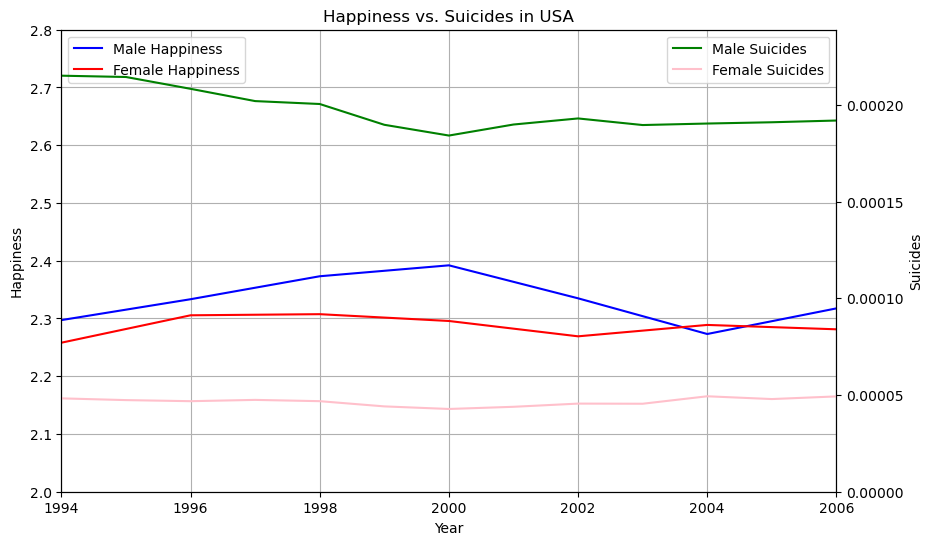

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the first plot with the "happy" data
fig, ax1 = plt.subplots(figsize=(10, 6))
# sns.lineplot(x='year',y='happy',ci=None,data=dfClean[(dfClean['female']==0)&(dfClean['unem10']==0)&(dfClean['divorce']==1)], ax=ax1, color='blue',label="Male/Employed/NotDivorced")
# sns.lineplot(x='year',y='happy',ci=None,data=dfClean[(dfClean['female']==0)&(dfClean['unem10']==1)&(dfClean['divorce']==0)], ax=ax1, color='purple',label="Male/UnEmployed/NotDivorced")
# sns.lineplot(x='year',y='happy',ci=None,data=dfClean[(dfClean['female']==0)&(dfClean['divorce']==1)&(dfClean['unem10']==1)], ax=ax1, color='red',label="Male/Divorced/Unemployed")
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==0)], ax=ax1, color='blue',label="Male Happiness")
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==1)], ax=ax1, color='red',label="Female Happiness")

# Create the second plot with the "suicides_no" data
ax2 = ax1.twinx()
#sns.lineplot(x="year", y="suicides_no", data=test, ax=ax2, color='green', label='Men Suicides')
# sns.lineplot(x="year", y="suicides_no", data=testWomen,ax=ax2,color='red',label='Women Suicides')
sns.lineplot(x="year", y="percapita", data=test, ax=ax2, color='green', label='Male Suicides')
sns.lineplot(x="year", y="percapita", data=testWomen,ax=ax2,color='pink',label='Female Suicides')

# Set the labels and title
ax1.set_xlim(xmin=1994)
ax1.set_xlim(xmax=2006)
ax1.grid()
ax1.set_ylim(ymin=2)
ax2.set_ylim(ymin=0)
ax1.set_ylim(ymax=2.8)

ax1.set_xlabel('Year')
ax1.set_ylabel('Happiness')
ax2.set_ylabel('Suicides')
ax1.set_title('Happiness vs. Suicides in USA')
ax1.legend(loc='upper left')

# Show the plot
plt.show()


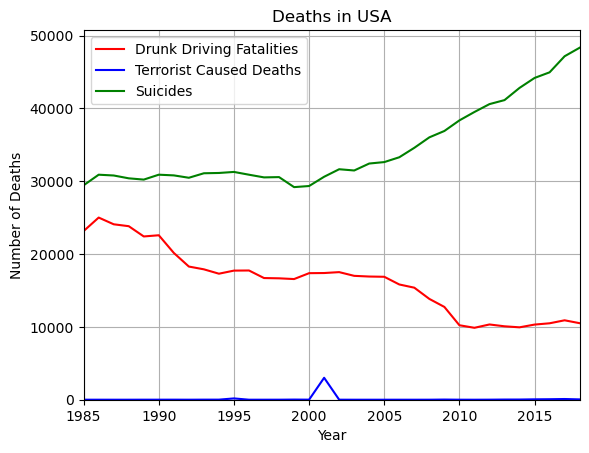

In [42]:
fig, ax = plt.subplots()
sns.lineplot(x="year", y="ddfat", data=ddTerr, ax=ax, color='red', label='Drunk Driving Fatalities')
sns.lineplot(x="year", y="nkill", data=ddTerr, ax=ax, color='blue', label='Terrorist Caused Deaths')
sns.lineplot(x="year", y="suicides", data=ddTerr, ax=ax, color='green', label='Suicides')

ax.set_title('Deaths in USA')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Deaths')
ax.grid()
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=1985)
ax.set_xlim(xmax=2018)

ax.legend()
ax
plt.show()

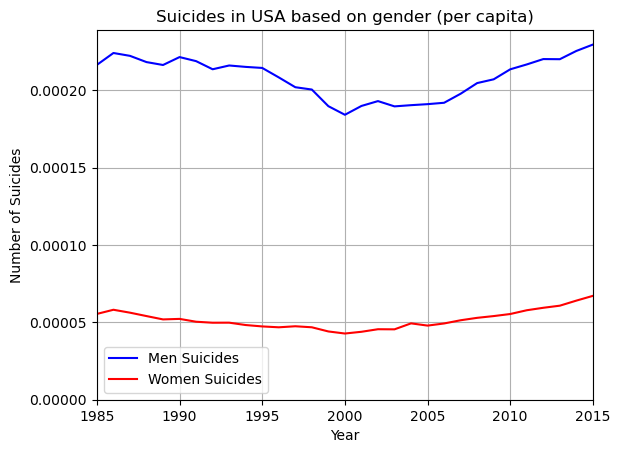

In [44]:
fig, ax = plt.subplots()
#test =usaOnly.loc[usaOnly['sex']==1].groupby('year').sum()
#testWomen =usaOnly.loc[usaOnly['sex']==2].groupby('year').sum()

sns.lineplot(x="year", y="percapita", data=test, ax=ax, color='blue', label='Men Suicides')
sns.lineplot(x="year", y="percapita", data=testWomen,ax=ax,color='red',label='Women Suicides')

ax.set_title('Suicides in USA based on gender (per capita)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Suicides')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=1985)
ax.set_xlim(xmax=2015)

ax.legend()
plt.grid()

plt.show()

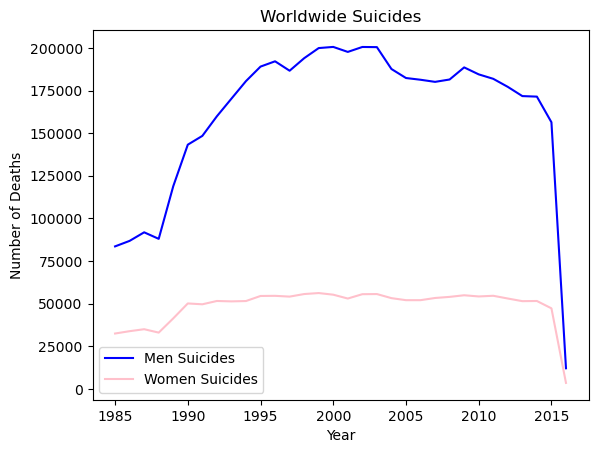

In [53]:
fig, ax = plt.subplots()
dftest =dfSuicide.loc[dfSuicide['sex']==1].groupby('year').sum()
dftestWomen =dfSuicide.loc[dfSuicide['sex']==2].groupby('year').sum()
sns.lineplot(x="year", y="suicides_no", data=dftest, ax=ax, color='blue', label='Men Suicides')
sns.lineplot(x="year", y="suicides_no", data=dftestWomen,ax=ax,color='pink',label='Women Suicides')

ax.set_title('Worldwide Suicides')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Deaths')

# Show the legend
ax.legend()

# Show the plot
plt.show()

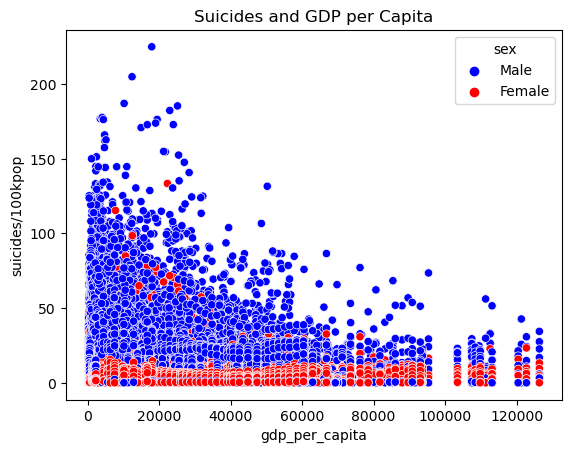

In [84]:
fig, ax = plt.subplots()

g= sns.scatterplot(x="gdp_per_capita", y="suicides/100kpop",palette=['blue','red'],hue='sex', data=testTwo)
ax.set_title('Suicides and GDP per Capita')
plt.show()

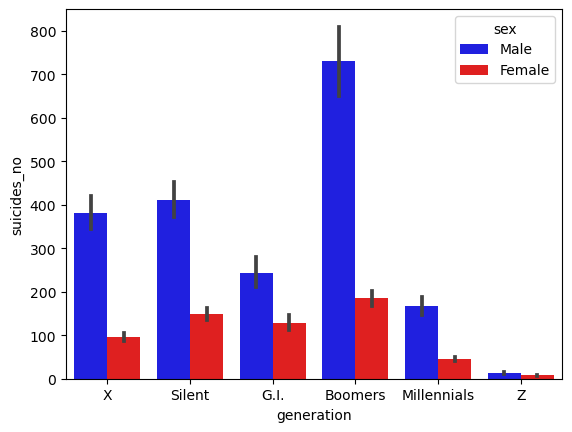

In [95]:
fig, ax = plt.subplots()
sns.barplot(x="generation",palette=['blue','red'], y="suicides_no",hue='sex', data=testTwo)

plt.show()